###### This project has industry based dataset and problem statement, we are using advanced supervised learning techniques to work on it

### Google Store App Rating Prediction
#### CONTEXT:
The Play Store apps data has enormous potential to drive app-making businesses to success. However, many apps
are being developed every single day and only a few of them become profitable. It is important for developers to be
able to predict the success of their app and incorporate features which makes an app successful. We can collect app
data and user ratings from the app stores and use it to extract insightful information. A machine learning model can be
used to predict rating for a given app, which can be used to estimate success and scope of improvement.
#### PROJECT OBJECTIVE:
The Goal is to predict the rating for an app based on the given input features like size, number of downloads etc.
#### DATA DESCRIPTION:
Web scraped data of 10k Play Store apps for analyzing the Android market. Each app (row)
has values for category, rating, size, and more.
#### ATTRIBUTE INFORMATION:
1. App: Application name
2. Category: Category the app belongs to
3. Rating: Overall user rating of the app
4. Reviews: Number of user reviews for the app
5. Size: Size of the app
6. Installs: Number of user downloads/installs for the app
7. Type: Paid or Free
8. Price: Price of the app
9. Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
10. Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game
will belong to Music, Game, Family genres.
11. Last Updated: Date when the app was last updated on Play Store
12. Current Ver: Current version of the app available on Play Store
13. Android Ver: Min required Android version

#### Steps to the project: [Total score: 20 points]
1. Import required libraries and read the data: [ Score: 1 point ]
- Import the required libraries and read the dataset.
- Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [168]:
df=pd.read_csv('Apps_data.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [169]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [170]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [171]:
df.shape

(10841, 13)

#### 2. Data cleansing and Exploratory data analysis: [ Score: 10 points ]
- Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.
- Check if there are any duplicate records in the dataset? if any drop them.
- Check the unique categories of the column 'Category', Is there are any invalid category? If yes drop them.
- Check if there are missing values present in the column Rating, If any? drop them and Convert ratings to high
and low categories(>3.5 is high rest low) and store it in a new column ‘Rating_category’.
- Check the distribution of the newly created column 'Rating_category' and comment on the distribution.
- Convert the column "Reviews" to numeric datatype and check the presence of outliers in the column and
handle the outliers using transformation approach.
- The column 'Size' contains alphanumeric values, handle the non numeric data and convert the column into
suitable datatype. (hint: Replace M with 1 million and K with 1 thousand, and drop/impute the entries where
size='Varies with device').
- Check the column 'Installs', handle the unwanted characters and convert the column into suitable dataype.
- Check the column 'Price', remove the unwanted characters and convert the column into suitable datatype.

In [172]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [173]:
df.describe(include=['O'])

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [174]:
#Dulicate
df.duplicated().sum()

483

In [175]:
#Droping Duplicate value from dataset
df = df.drop_duplicates()
len(df)

10358

In [176]:
# unique categories of the column 'Category'
df.Category.value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [177]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

#### '1.9' is wrong value. So I have to remove row where '1.9' exists

In [178]:
df = df[df['Category'] != '1.9']

In [179]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [180]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [181]:
df['Rating'].dtype

dtype('float64')

In [182]:
df['Rating'].isnull().sum()

1465

In [183]:
#Rating New Category
df['Rating_category'] = np.where(df['Rating']> 3.5,'high','low')

In [184]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [185]:
df[df['Reviews'] =='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category


In [186]:
df['Size'] = df.Size.apply(lambda x: x.strip('+'))# Removing the + Sign

In [187]:
df['Size'] = df.Size.apply(lambda x: x.replace(',', ''))# For removing the `,`

In [188]:
df['Size'] = df.Size.apply(lambda x: x.replace(',', ''))# For removing the `,`

In [189]:
df['Size'] = df.Size.apply(lambda x: x.replace('M', 'e+6'))# For converting the M to Mega

In [190]:
df['Size'] = df.Size.apply(lambda x: x.replace('k', 'e+3'))# For convertinf the K to Kilo

In [191]:
# df['Reviews'] = df.Reviews.replace("0.0",0)
# df['Reviews'] = df.Reviews.replace("3.0M",3000000.0)
# df['Reviews'] = df['Reviews'].astype(float)
# df['Reviews'].dtype

In [192]:
df['Size'].unique()

array(['19e+6', '14e+6', '8.7e+6', '25e+6', '2.8e+6', '5.6e+6', '29e+6',
       '33e+6', '3.1e+6', '28e+6', '12e+6', '20e+6', '21e+6', '37e+6',
       '2.7e+6', '5.5e+6', '17e+6', '39e+6', '31e+6', '4.2e+6', '7.0e+6',
       '23e+6', '6.0e+6', '6.1e+6', '4.6e+6', '9.2e+6', '5.2e+6', '11e+6',
       '24e+6', 'Varies with device', '9.4e+6', '15e+6', '10e+6',
       '1.2e+6', '26e+6', '8.0e+6', '7.9e+6', '56e+6', '57e+6', '35e+6',
       '54e+6', '201e+3', '3.6e+6', '5.7e+6', '8.6e+6', '2.4e+6', '27e+6',
       '2.5e+6', '16e+6', '3.4e+6', '8.9e+6', '3.9e+6', '2.9e+6', '38e+6',
       '32e+6', '5.4e+6', '18e+6', '1.1e+6', '2.2e+6', '4.5e+6', '9.8e+6',
       '52e+6', '9.0e+6', '6.7e+6', '30e+6', '2.6e+6', '7.1e+6', '3.7e+6',
       '22e+6', '7.4e+6', '6.4e+6', '3.2e+6', '8.2e+6', '9.9e+6',
       '4.9e+6', '9.5e+6', '5.0e+6', '5.9e+6', '13e+6', '73e+6', '6.8e+6',
       '3.5e+6', '4.0e+6', '2.3e+6', '7.2e+6', '2.1e+6', '42e+6',
       '7.3e+6', '9.1e+6', '55e+6', '23e+3', '6.5e+6', '1.5e+

Data type of Size is object. I have to convert the column because it contains the application sizes. Firstly I will change 'Varies with device' value with NAN. Then I drop 'M' and 'k', changing from '1000+' to 1000. Finally, I convert float value.

In [193]:
df['Size'] = df.Size.replace("Varies with device",np.nan)
df['Size'] = df.Size.str.replace("M","000") # All size values became the kilobyte type.
df['Size'] = df.Size.str.replace("k","")
df['Size'] = df.Size.replace("1,000+",1000)
df['Size'] =df['Size'].astype(float)
df['Size'].dtype

dtype('float64')

In [194]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

Data type of Size is object. I'm gonna make similar processes, which I made the in 'Size'.

In [195]:
df['Installs'] = df.Installs.str.replace(",","")
df['Installs'] = df.Installs.str.replace("+","")
df['Installs'] = df.Installs.replace("Free",np.nan)
df['Installs'] = df['Installs'].astype(float)
df['Installs'].dtype

dtype('float64')

In [196]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [197]:
df['Price'] = df.Price.replace("Everyone",np.nan)
df['Price'] = df.Price.str.replace("$","").astype(float)
df['Price'].dtype

dtype('float64')

<AxesSubplot:xlabel='Rating', ylabel='Count'>

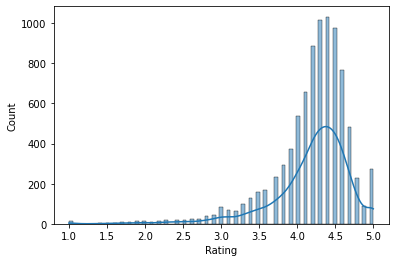

In [198]:
# Rating distribution of all apps, for comparsion
sns.histplot(df['Rating'], kde=True)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

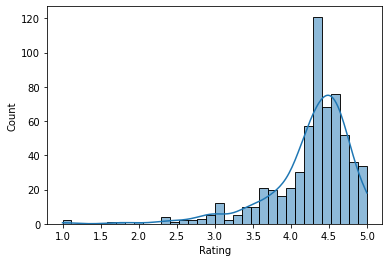

In [199]:
# Rating distribution of all paid apps
all_paid = df[df['Type'] == 'Paid']
sns.histplot(all_paid['Rating'], kde=True)

The graphs above have no distinctive features. Although there are some slight discrepancies in the height of the KDE curve, the graphs are nontheless similar.

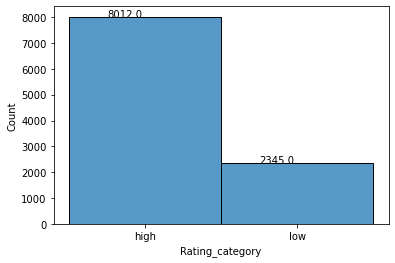

In [200]:
#Rating_Category distribution
ax = sns.histplot(df['Rating_category'])


for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


plt.show()

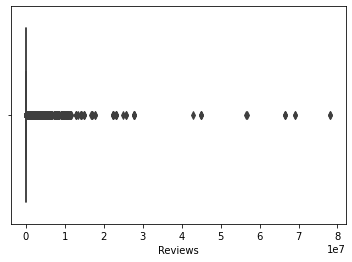

count    1.035700e+04
mean     4.059046e+05
std      2.696778e+06
min      0.000000e+00
25%      3.200000e+01
50%      1.680000e+03
75%      4.641600e+04
max      7.815831e+07
Name: Reviews, dtype: float64


In [201]:
# apply standardization
df.Reviews =df.Reviews.astype(int)
#ax = df.Reviews.plot.box()
sns.boxplot(x=df['Reviews'])
plt.show()
print(df.Reviews.describe())
#Log Transformation 
df.Reviews = np.log(df.Reviews)

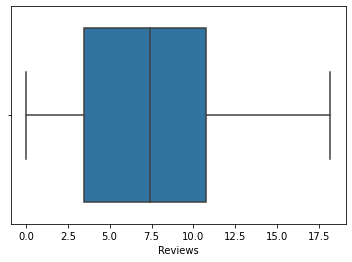

count    1.035700e+04
mean             -inf
std               NaN
min              -inf
25%      3.465736e+00
50%      7.426549e+00
75%      1.074540e+01
max      1.817425e+01
Name: Reviews, dtype: float64


In [202]:
sns.boxplot(x=df['Reviews'])
plt.show()
print(df.Reviews.describe())

### Distribution of Ratings

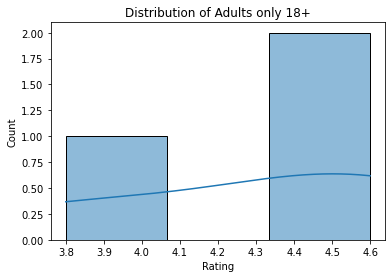

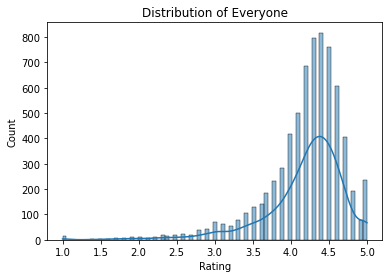

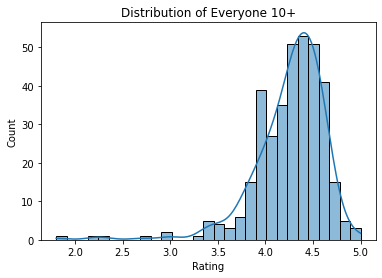

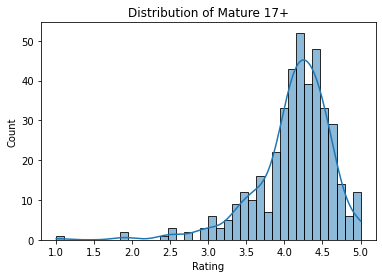

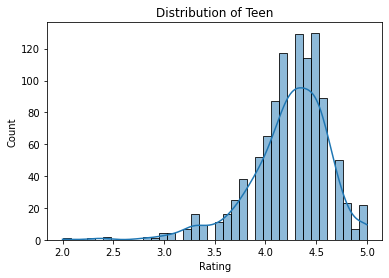

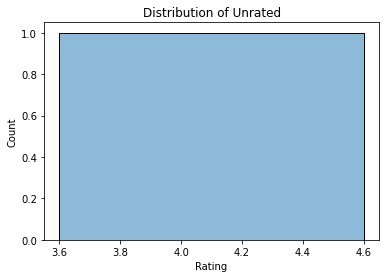

In [203]:
crs = ['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+', 'Teen', 'Unrated']

for i in crs:
    matches = df[df['Content Rating'] == i]
    sns.histplot(matches.Rating, kde=True).set(title=f'Distribution of {i}')
    plt.show()

The awkward graphs of Adults only 18+ and Unrated are caused by the relatively small numbers of apps assigned to that category. Nevertheless, we can see that the distribution is slightly skewed all the while being mostly normal.

#### Type vs. Score

In [204]:
# Group the data by `type`, aggregating the average `rating`, and `installs` for each type.
type_score = df.groupby("Type").aggregate({"Rating": "mean", "Installs": "mean"})
type_score.reset_index(inplace=True)
type_score.head()

,Type,Rating,Installs
0,Free,4.182425,1.528127e+07
1,Paid,4.261501,9.049135e+04


[Text(0.5, 0, 'Type'),
 Text(0, 0.5, 'Rating'),
 Text(0.5, 1.0, 'Type vs. Rating')]

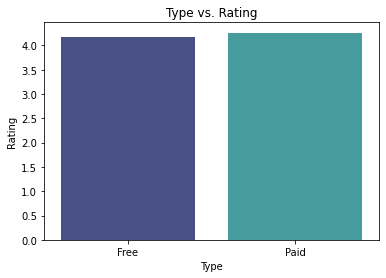

In [205]:
# RAting
sns.barplot(x='Type', y='Rating', data=type_score, palette='mako').set(xlabel='Type', ylabel='Rating', title='Type vs. Rating')

As visible in the graph above, the average rating for each type is approximately the same. While this result may seem counterintuitive to some, a reasonable process is unknowingly employed to judge most apps accurately. The average user generally rates based on sheer user experience, not on the price or the number of installations.

However, two anomalous cases conveniently counteract each other. Both cases result from experiences with paid apps yet entail different emotions. The first of these cases results from pungent dissatisfaction. If a user felt an app was not delivering the appropriate amount of quality for its price, the user, not overall disappointed with the quality of the app, would write a negative review and leave a rating toward the lower end of the spectrum. In contrast, the other case is the product of abounding appreciation for a particular application. In this scenario, the user feels the app is too good for its price, thus giving it a higher rating. These two contrasting cases effectively cancel each other out, resulting in a moderately accurate average rating for the paid apps.

[Text(0.5, 0, 'Type'),
 Text(0, 0.5, 'Installs'),
 Text(0.5, 1.0, 'Type vs. Installs')]

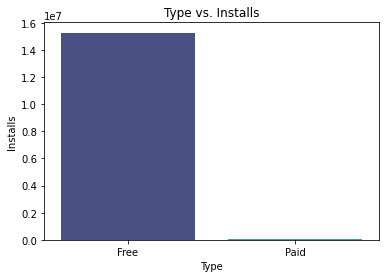

In [206]:
# Installs
sns.barplot(x='Type', y='Installs', palette='mako', data=type_score).set(xlabel='Type', ylabel='Installs', title='Type vs. Installs')

As expected, free apps are much more likely to be installed than paid apps. The difference between the two categories is incredibly high. I expected a patent difference, but not one this pronounced.

On a bit of a side note, these two graphs underscore why installs and rating were picked as the two metrics for this exploratory data analysis. While they may initially seem tightly correlated and futile in conjunction, the preceding graphs differentiate them, each providing benefits to the exploration.

The two previous graphs provided a high-level overview of the relationship between type and one of the scoring metrics. However, in search of a mostly complete picture, we will not only need a high-level overview but one that provides insight into distributions of each type within each scoring metric. This subsequent analysis will help us identify any additional and potentially overlooked nuance.

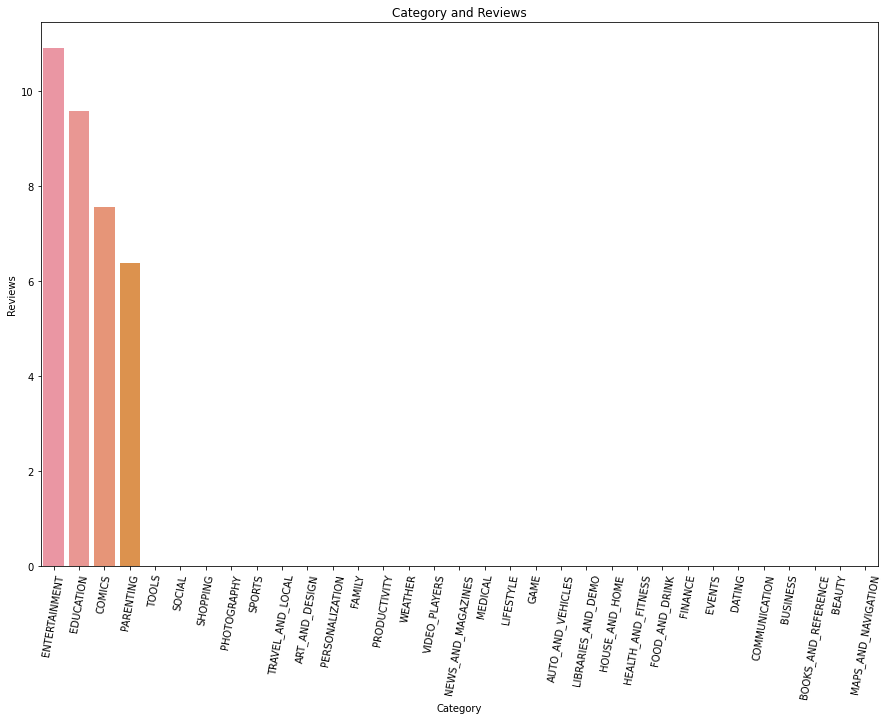

In [207]:
category_list = list(df['Category'].unique())
category_review = []
for i in category_list:
    x = df[df['Category'] == i]
    if(len(x)!=0):
        review = sum(x.Reviews)/len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)
#sorting
data_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})
new_index = (data_category_reviews['review'].sort_values(ascending=False)).index.values
sorted_data =data_category_reviews.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

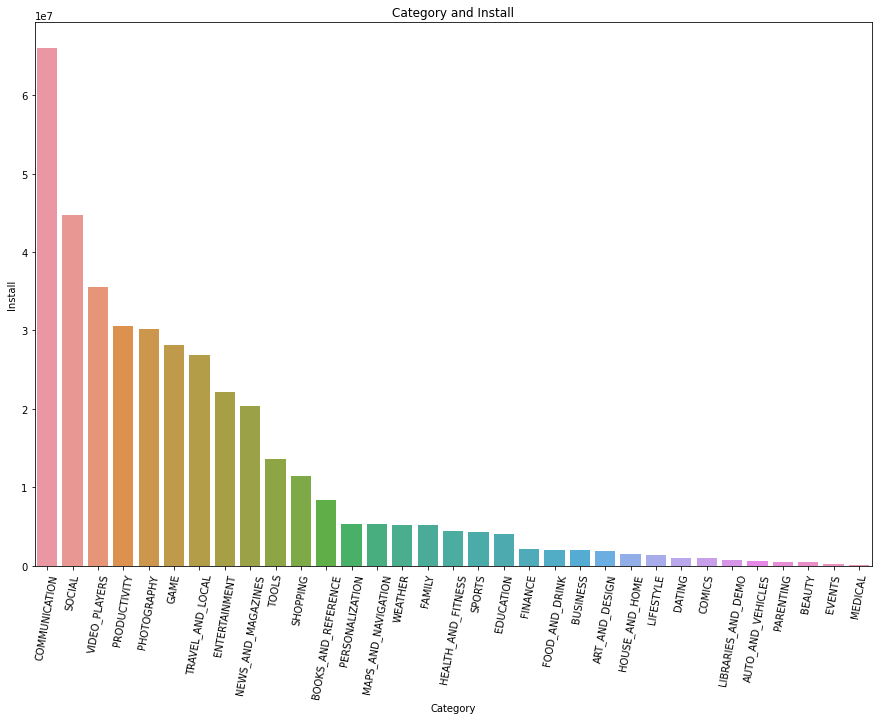

In [208]:
category_list = list(df['Category'].unique())
category_install = []
for i in category_list:
    x = df[df['Category'] == i]
    if(len(x)!=0):
        install = sum(x.Installs)/len(x)
        category_install.append(install)
    else:
        install = sum(x.Installs)
        category_install.append(install)
        
#sorting
data_category_install = pd.DataFrame({'category': category_list,'install':category_install})
new_index = (data_category_install['install'].sort_values(ascending=False)).index.values
sorted_data =data_category_install.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['install'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Install")
plt.title("Category and Install")
plt.show()

In [209]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.205919,0.081966,0.050886,-0.022355
Reviews,0.205919,1.000000,0.378369,0.319092,-0.034644
Size,0.081966,0.378369,1.000000,0.168872,-0.023767
Installs,0.050886,0.319092,0.168872,1.000000,-0.011147
Price,-0.022355,-0.034644,-0.023767,-0.011147,1.000000


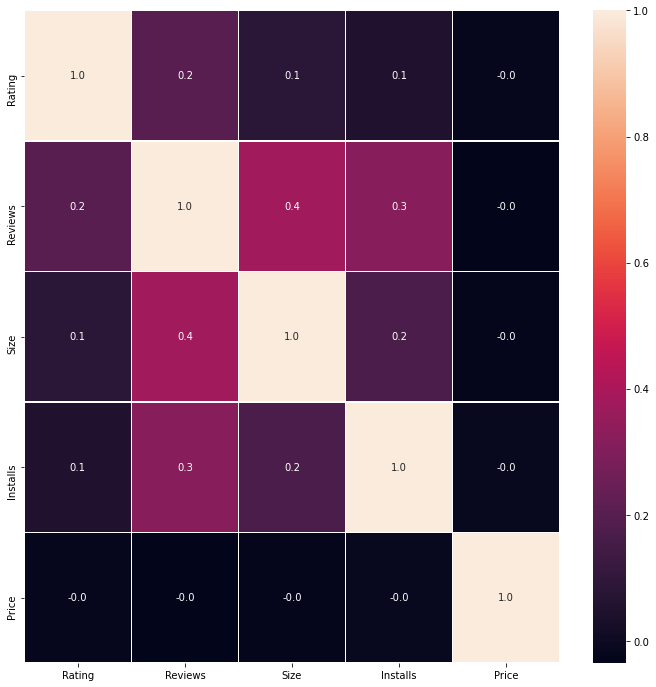

In [210]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

#### 3. Data Preparation for model building: [ Score: 2 points ]
- Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we
created a new feature from it (i.e. rating_category) will use that as target.)
- For the target column 'Rating_category' Replace 'high' as 1 and 'low' as 0.
- Encode the categorical columns.
- Segregate the target and independent features.
- Split the dataset into train and test.
- Standardize the data, so that the values are within a particular range.

In [211]:
df['Rating'].isnull().sum()

1465

In [212]:
#dropp Null value
df.dropna(inplace = True)

In [213]:
#model purpose dataset

data = df[['Category', 'Reviews', 'Size', 'Installs','Price', 'Content Rating', 'Genres','Rating_category']]
data.head(4)

,Category,Reviews,Size,Installs,Price,Content Rating,Genres,Rating_category
0,ART_AND_DESIGN,5.068904,19000000.0,10000.0,0.0,Everyone,Art & Design,high
1,ART_AND_DESIGN,6.874198,14000000.0,500000.0,0.0,Everyone,Art & Design;Pretend Play,high
2,ART_AND_DESIGN,11.379508,8700000.0,5000000.0,0.0,Everyone,Art & Design,high
3,ART_AND_DESIGN,12.281384,25000000.0,50000000.0,0.0,Teen,Art & Design,high


In [214]:
data['Rating_category'] = np.where(df['Rating_category'] =='high',1 ,0)

In [215]:
# Encoding vars
categorical_cols = ['Category', "Content Rating", "Genres"]

In [216]:
df = pd.get_dummies(data, columns= ['Category', "Content Rating", "Genres"], drop_first = True)

In [217]:
# Split the dataset into train and test ; Standardize the data,
df.columns

Index(['Reviews', 'Size', 'Installs', 'Price', 'Rating_category',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Strategy;Education', 'Genres_Tools', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=153)

In [218]:
X = df.drop('Rating_category',axis=1)
y = df['Rating_category']

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(5192, 152) (2226, 152)
(5192,) (2226,)


In [220]:
#Standarzation 
ss = StandardScaler()
X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

In [221]:
X_train.head()

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
5196,-1.040016,-0.876823,-0.171884,-0.064407,-0.089217,-0.066705,-0.142969,-0.178316,-0.07875,-0.170099,...,-0.01388,-0.310296,-0.144366,-0.01388,-0.065233,-0.124301,-0.01388,-0.01388,-0.08472,-0.057315
429,1.119373,-0.859608,0.081663,-0.064407,-0.089217,-0.066705,-0.142969,-0.178316,-0.07875,5.878915,...,-0.01388,-0.310296,-0.144366,-0.01388,-0.065233,-0.124301,-0.01388,-0.01388,-0.08472,-0.057315
3306,0.762480,-0.820874,-0.146531,-0.064407,-0.089217,-0.066705,-0.142969,-0.178316,-0.07875,-0.170099,...,-0.01388,3.222726,-0.144366,-0.01388,-0.065233,-0.124301,-0.01388,-0.01388,-0.08472,-0.057315
5663,-0.316311,-0.609989,-0.169351,-0.064407,-0.089217,-0.066705,-0.142969,-0.178316,-0.07875,-0.170099,...,-0.01388,-0.310296,-0.144366,-0.01388,-0.065233,-0.124301,-0.01388,-0.01388,-0.08472,-0.057315
7782,-0.516858,-0.855304,-0.170618,-0.064407,-0.089217,-0.066705,-0.142969,-0.178316,-0.07875,-0.170099,...,-0.01388,3.222726,-0.144366,-0.01388,-0.065233,-0.124301,-0.01388,-0.01388,-0.08472,-0.057315


#### 4. Model training, and testing: [ Score: 5 points ]
- Write a function to fit and print the model predictions, input parameters would be model, train, and test data.
- Use the above function and train a Decision tree, Random Forest, Bagging, Boosting, and Stacked Classifier
models and make predictions on test data and evaluate the models.

In [222]:
 # take the model, and data as inputs
def fit_n_print(model, X_train, X_test, y_train, y_test): 
    
    # fit the model with the train data
    model.fit(X_train, y_train)   
    # make predictions on the test set
    pred = model.predict(X_test)  
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print('\033[1;46;13m Train accuracy: \033[0;0m',train_score)
    print('\033[1;46;13m Test accuracy: \033[0;0m',test_score)
    print('\n')
    print('\033[1;46;13m Confusion matrix: \033[0;0m','\n',confusion_matrix(y_test, pred))
    print('\n')
    print('\033[1;46;13m Classification report: \033[0;0m','\n',classification_report(y_test, pred))

In [223]:
## instantiate 
dt = DecisionTreeClassifier()

## call the function
fit_n_print(dt, X_train, X_test, y_train, y_test)

 Train accuracy:  1.0
 Test accuracy:  0.8333333333333334


 Confusion matrix:  
 [[  63  181]
 [ 190 1792]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.25      0.26      0.25       244
           1       0.91      0.90      0.91      1982

    accuracy                           0.83      2226
   macro avg       0.58      0.58      0.58      2226
weighted avg       0.84      0.83      0.83      2226



In [ ]:
## instanstiate
rf = RandomForestClassifier()

## call the function
fit_n_print(rf, X_train, X_test, y_train, y_test)

In [ ]:
## instanstiate
bg = BaggingClassifier()

## call the function
fit_n_print(bg, X_train, X_test, y_train, y_test)

In [ ]:
## instanstiate 
gb = GradientBoostingClassifier()

## call the function
fit_n_print(gb, X_train, X_test, y_train, y_test)

In [ ]:
## instanstiate
ab = AdaBoostClassifier()

## call the function
fit_n_print(ab, X_train, X_test, y_train, y_test)

In [ ]:
## instantiate
estimators = [('dt', dt), ('rf', rf), ('bg', bg), ('gb', gb), ('ab', ab)]
clf = StackingClassifier(estimators = estimators, final_estimator = rf)

## call the function
fit_n_print(clf, X_train, X_test, y_train, y_test)

5. Conclusion and improvisation: [ Score: 2 point ]
- Comparing all algorithms we find that Gradient Boosting gave best prediction
- We can do Cross Validataion and hyperparameter tuning to get the better accuracy for our model.
- Also we have to give the feature importance as we have around 152 features in our hand.
- Those three processes can help our model get better results. 
